In [2]:
pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.2 MB/s eta 0:00:00


In [3]:
pip install tensorflow

In [10]:
from mtcnn import MTCNN
import cv2

image_path = 'grayscale_face.jpg'
img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
detector = MTCNN()
detections = detector.detect_faces(img)
detections

1/1 [==============================] - 0s 145ms/step


[{'box': [225, 90, 384, 497],
  'confidence': 0.9951490759849548,
  'keypoints': {'left_eye': (330, 288),
   'right_eye': (517, 287),
   'nose': (418, 404),
   'mouth_left': (353, 489),
   'mouth_right': (500, 490)}}]

(-0.5, 877.5, 749.5, -0.5)

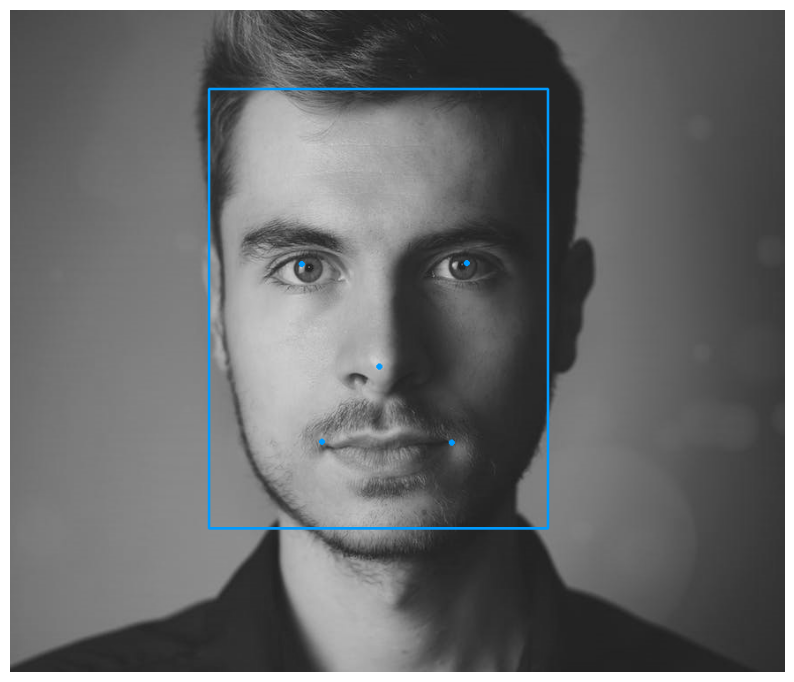

In [11]:
import matplotlib.pyplot as plt

img_with_dets = img.copy()
min_conf = 0.9
for det in detections:
    if det['confidence'] >= min_conf:
        x, y, width, height = det['box']
        keypoints = det['keypoints']
        cv2.rectangle(img_with_dets, (x,y), (x+width,y+height), (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['left_eye']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['right_eye']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['nose']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['mouth_left']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['mouth_right']), 2, (0,155,255), 2)
plt.figure(figsize = (10,10))
plt.imshow(img_with_dets)
plt.axis('off')